In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2001 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_01(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_s.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m01=Minuit(twi_minus_loglikelihood_01,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,-1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,10.0),limit_log_poisson=(-3,3),
         errordef=1)

m01.migrad()

pprint(m01.fval)

FCN = 1620.4781062534814 
 TOTAL NCALL = 128 
 NCALLS = 128 
 
 
 EDM = 3.7391401326202532e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.52662,0.257414,,,-3,-1,No
1,log_f_b,-3.97215,0.18321,,,-5,-2,No
2,alpha_H,4.69275,1.87448,,,1,10,No
3,log_poisson,0.207881,0.0192058,,,-3,3,No


1620.4781062534814


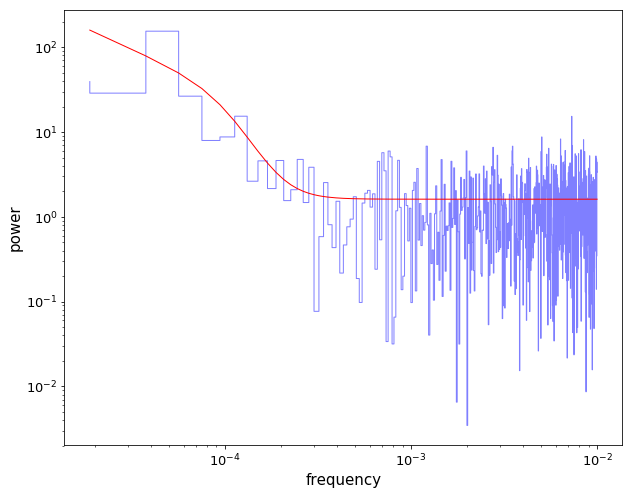

In [4]:
perdata01 = pd.read_csv("perlist01_s.csv")
f_01 = perdata01['f']
per_01 = perdata01['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m01.values[0],m01.values[1],m01.values[2],m01.values[3]

model_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_01.append(((f_01[i]**(-alpha_L))/(1+(f_01[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2001 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_01(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_s.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n01=Minuit(twi_minus_loglikelihood_nobreak_01,log_A=-6,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-11,-5),limit_alpha=(0.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n01.migrad()

print(n01.fval)

FCN = 1624.8065397859004 
 TOTAL NCALL = 113 
 NCALLS = 113 
 
 
 EDM = 1.659122249697497e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-9.20156,1.49119,,,-11,-5,No
1,alpha,2.55524,0.394108,,,0,5,No
2,log_poisson,0.205623,0.0193153,,,-3,3,No


1624.8065397859004


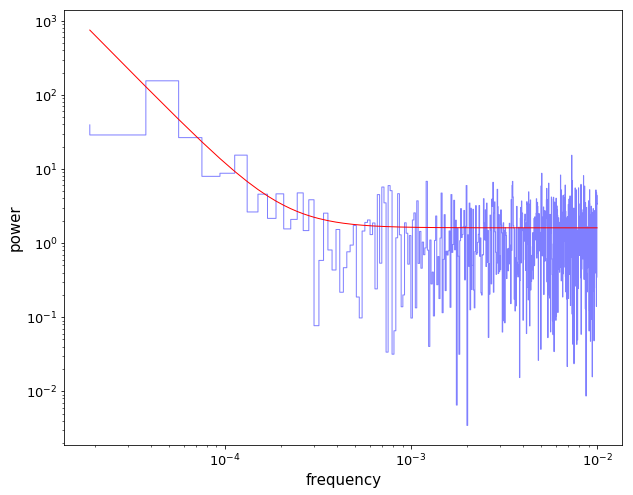

In [7]:
log_A,alpha,log_poisson = n01.values[0],n01.values[1],n01.values[2]

model_nob_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_nob_01.append((f_01[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_nob_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

4.328433532419012


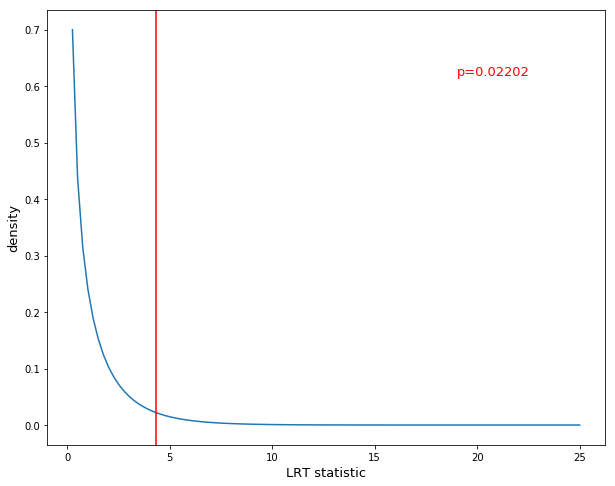

In [8]:
import scipy.stats as stats

# LRT statistic
T = n01.fval-m01.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2007(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_071(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata071 = pd.read_csv("perlist071_s.csv")
    f = perdata071['f']
    per = perdata071['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata071)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m071=Minuit(twi_minus_loglikelihood_071,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,-1), limit_log_f_b=(-6,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m071.migrad()

pprint(m071.fval)

FCN = 955.5319109132531 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 3.461095293469097e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.11912,0.475778,,,-3,-1,No
1,log_f_b,-4.32546,0.341967,,,-6,-2,No
2,alpha_H,3.68697,1.04213,,,1,5,No
3,log_poisson,0.00326615,0.020888,,,-3,3,No


955.5319109132531


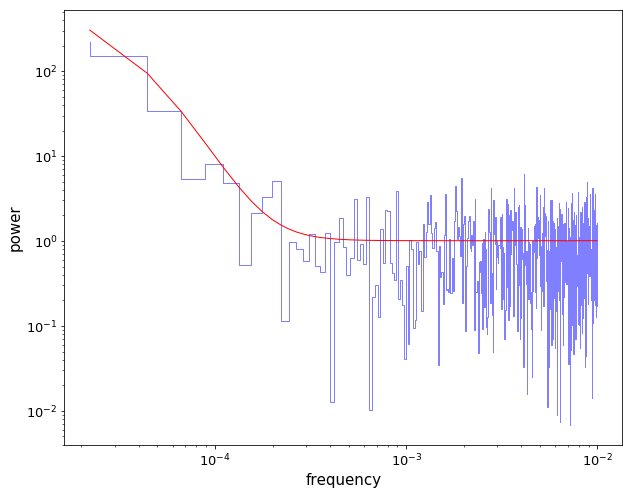

In [11]:
perdata071 = pd.read_csv("perlist071_s.csv")
f_071 = perdata071['f']
per_071 = perdata071['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m071.values[0],m071.values[1],m071.values[2],m071.values[3]

model_071 = []
f_length_071 = len(f_071)
for i in range(f_length_071):
    model_071.append(((f_071[i]**(-alpha_L))/(1+(f_071[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_071, per_071, color="b", alpha=0.5, linewidth=1)
plt.plot(f_071, model_071, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2007(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_071(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata071 = pd.read_csv("perlist071_s.csv")
    f = perdata071['f']
    per = perdata071['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata071)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n071=Minuit(twi_minus_loglikelihood_nobreak_071,log_A=-10,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-13,-7),limit_alpha=(0.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n071.migrad()

pprint(n071.fval)

FCN = 956.4045206250181 
 TOTAL NCALL = 130 
 NCALLS = 130 
 
 
 EDM = 7.914910249383769e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-10.951,1.60914,,,-13,-7,No
1,alpha,2.95494,0.418766,,,0,5,No
2,log_poisson,0.00229795,0.020888,,,-3,3,No


956.4045206250181


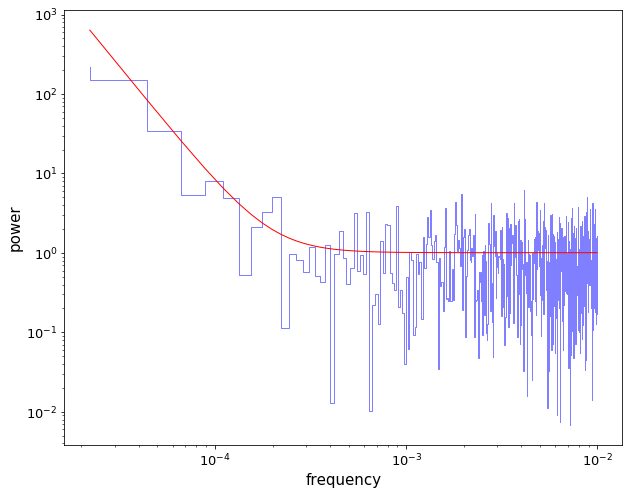

In [14]:
log_A,alpha,log_poisson = n071.values[0],n071.values[1],n071.values[2]

model_nob_071 = []
f_length_071 = len(f_071)
for i in range(f_length_071):
    model_nob_071.append((f_071[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_071, per_071, color="b", alpha=0.5, linewidth=1)
plt.plot(f_071, model_nob_071, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.8726097117649942


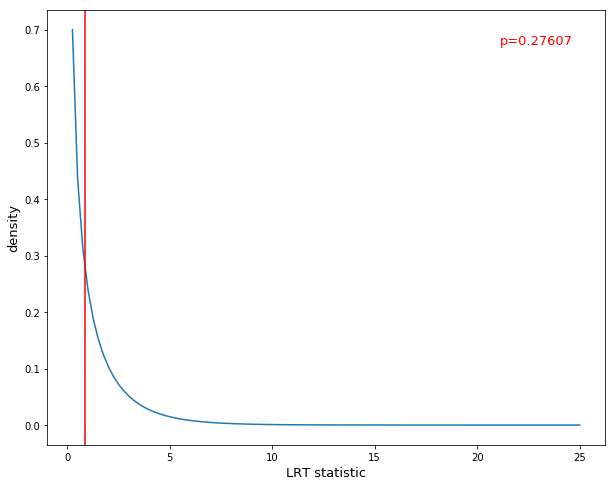

In [15]:
import scipy.stats as stats

# LRT statistic
T = n071.fval-m071.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [16]:
data01 = pd.read_csv("energy_pg1211_01.csv")  
x01 = data01['x']
y01 = data01['y']
xerr01 = data01['xerr']
yerr01 = data01['yerr']

data071 = pd.read_csv("energy_pg1211_071.csv")  
x071 = data071['x']
y071 = data071['y']
xerr071 = data071['xerr']
yerr071 = data071['yerr']

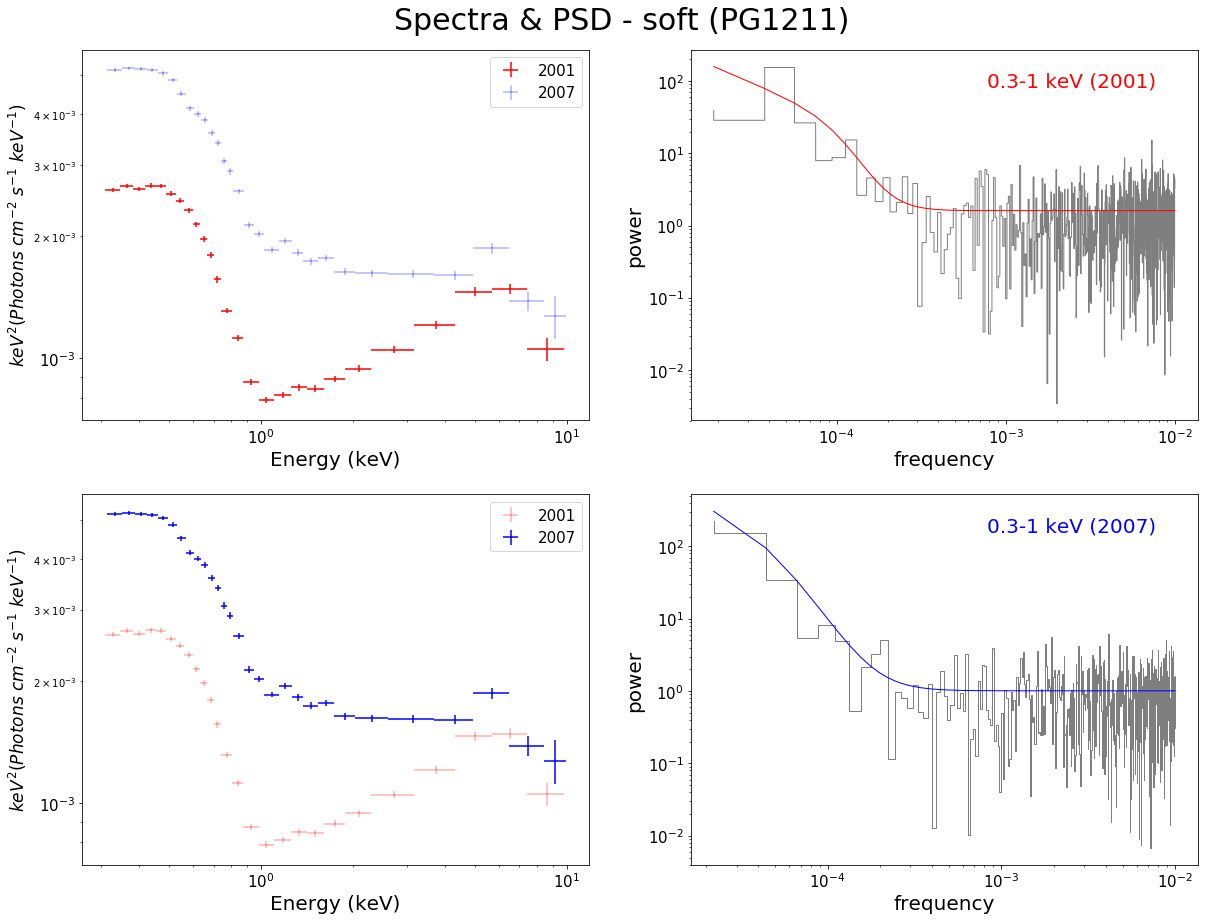

In [17]:
fig= plt.figure(figsize=(20,15))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


ax1.loglog()
ax1.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', label='2001')
ax1.errorbar(x071, y071, yerr=yerr071, xerr=xerr071, fmt=',b', alpha=0.3, label='2007')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', alpha=0.3, label='2001')
ax3.errorbar(x071, y071, yerr=yerr071, xerr=xerr071, fmt=',b', label='2007')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_01, per_01, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_01, model_01, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2001)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_071, per_071, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_071, model_071, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2007)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

plt.suptitle("Spectra & PSD - soft (PG1211)", x=0.5, y=0.92, fontsize=30)
plt.show()